In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos data sintetica

In [13]:
tokens_in_vocabulary = 30
N=10000
ejemplo_seleccionado = 20

x = np.arange(tokens_in_vocabulary)

random_array = np.random.random(size=(N, tokens_in_vocabulary))

In [14]:
random_array[ejemplo_seleccionado][:5]

array([0.56804753, 0.00753769, 0.98660862, 0.70553947, 0.45960368])

# Calculamos la fdp para un sample dado

In [15]:
fdp = np.exp(random_array[ejemplo_seleccionado])/np.exp(random_array).sum()

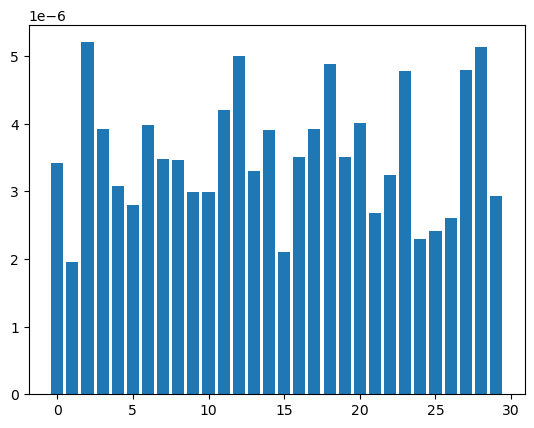

In [16]:
plt.bar(x, height=fdp)
plt.show()

# Reescalamos la fdp

<BarContainer object of 30 artists>

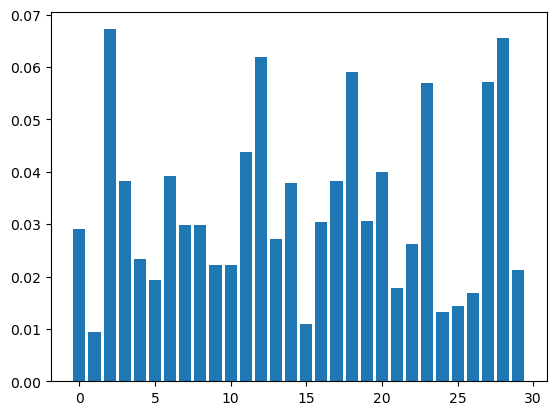

In [17]:
logits = np.log(fdp)

temperature = 0.5

logits /= temperature

fdp_with_temperature = np.exp(logits)/np.exp(logits).sum()

plt.bar(x, height=fdp_with_temperature)

In [18]:
def reweight_fdp(fdp, temperature):
    logits = np.log(fdp)
    logits /= temperature

    return np.exp(logits)/np.exp(logits).sum()

# Efecto de diferentes temperaturas

<BarContainer object of 30 artists>

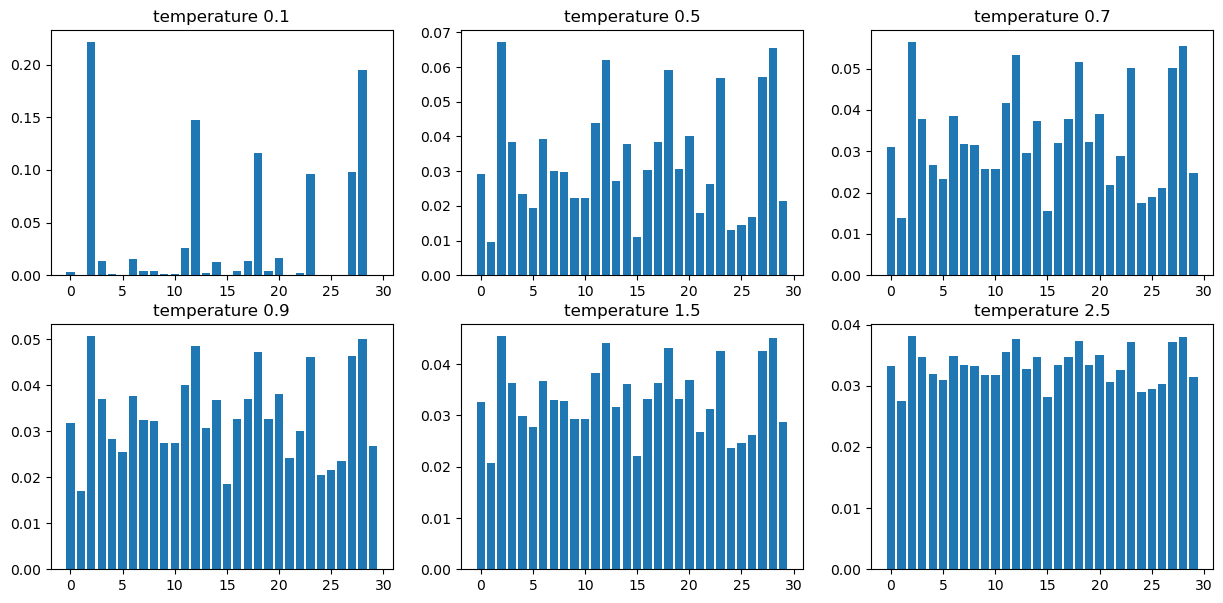

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

ax[0, 0].set_title("temperature 0.1")
ax[0, 0].bar(x, height=reweight_fdp(fdp, 0.1))
ax[0, 1].set_title("temperature 0.5")
ax[0, 1].bar(x, height=reweight_fdp(fdp, 0.5))
ax[0, 2].set_title("temperature 0.7")
ax[0, 2].bar(x, height=reweight_fdp(fdp, 0.7))

ax[1, 0].set_title("temperature 0.9")
ax[1, 0].bar(x, height=reweight_fdp(fdp, 0.9))
ax[1, 1].set_title("temperature 1.5")
ax[1, 1].bar(x, height=reweight_fdp(fdp, 1.25))
ax[1, 2].set_title("temperature 2.5")
ax[1, 2].bar(x, height=reweight_fdp(fdp, 3.0))